In [13]:
import matplotlib.pyplot as plt
import numpy as np

from perceptron import Perceptron

In [14]:
def make_data(n, mean=None, cov=None, train_percentage=0.8):
    train_data_size = int(n * train_percentage)
    data = np.random.multivariate_normal(mean, cov, n)
    return data[:train_data_size], data[train_data_size:]


def classify(mean: tuple = None, cov: tuple = (None, None)):
    if mean is None:
        mean = ([0, 0], [0, 0])
    if cov == (None, None):
        cov = ([[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]])

    train_data_0, test_data_0 = make_data(100, mean[0], cov[0])
    train_data_1, test_data_1 = make_data(100, mean[1], cov[1])
    train_data = np.concatenate((train_data_0, train_data_1))
    train_labels = np.concatenate((np.array([1] * 80), np.array([-1] * 80)))
    test_data = np.concatenate((test_data_0, test_data_1))
    test_labels = np.concatenate((np.array([1] * 20), np.array([-1] * 20)))

    plt.scatter(train_data_0[:, 0], train_data_0[:, 1])
    plt.scatter(train_data_1[:, 0], train_data_1[:, 1])
    plt.show()
    perceptron = Perceptron(2)
    perceptron.train(train_data, train_labels)
    print(f'Class 1: mean = {mean[0]}, cov = {cov[0]}')
    print(f'Class 2: mean = {mean[1]}, cov = {cov[1]}')
    accuracy = perceptron.accuracy(test_data, test_labels)
    print(f'Accuracy: {accuracy}')
    return accuracy

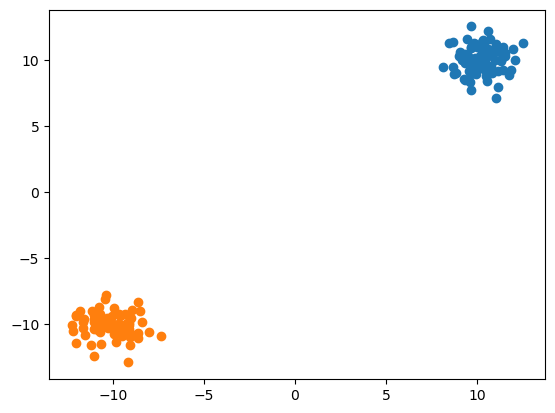

Class 1: mean = [10, 10], cov = [[1.0, 0.0], [0.0, 1.0]]
Class 2: mean = [-10, -10], cov = [[1.0, 0.0], [0.0, 1.0]]
Accuracy: 1.0


1.0

In [15]:
classify(([10, 10], [-10, -10]))

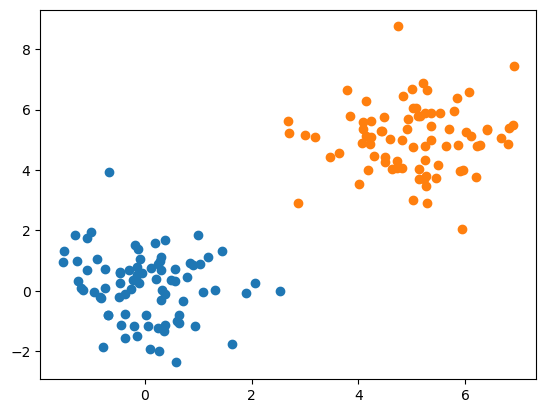

Class 1: mean = [0, 0], cov = [[1.0, 0.0], [0.0, 1.0]]
Class 2: mean = [5, 5], cov = [[1.0, 0.0], [0.0, 1.0]]
Accuracy: 0.775


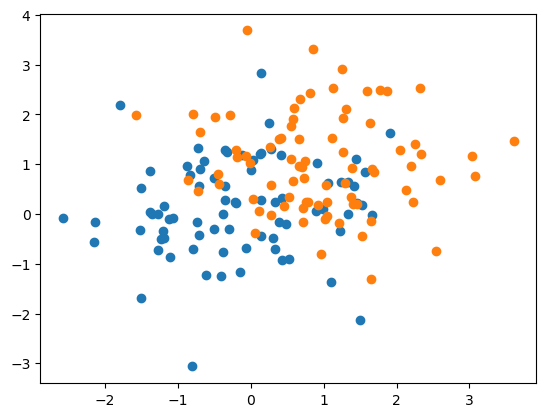

Class 1: mean = [0, 0], cov = [[1.0, 0.0], [0.0, 1.0]]
Class 2: mean = [1, 1], cov = [[1.0, 0.0], [0.0, 1.0]]
Accuracy: 0.675


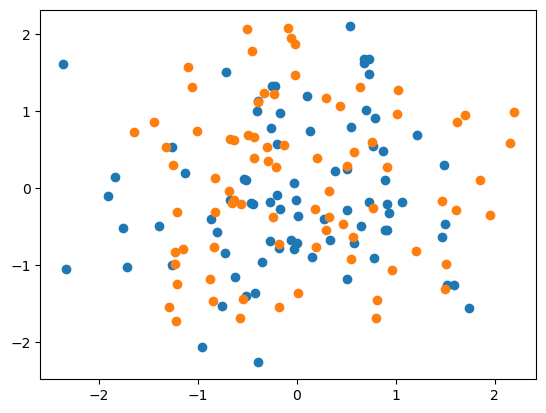

Class 1: mean = [0, 0], cov = [[1.0, 0.0], [0.0, 1.0]]
Class 2: mean = [0.1, 0.1], cov = [[1.0, 0.0], [0.0, 1.0]]
Accuracy: 0.425


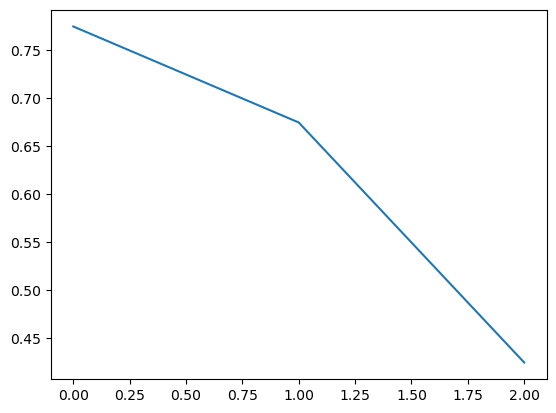

In [16]:
plt.plot([
    classify(([0, 0], [5, 5])),
    classify(([0, 0], [1, 1])),
    classify(([0, 0], [0.1, 0.1]))
])
plt.show()

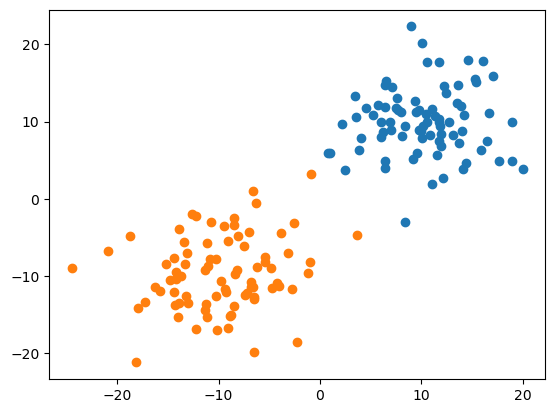

Class 1: mean = [10, 10], cov = [[20, 0], [0, 20]]
Class 2: mean = [-10, -10], cov = [[20, 0], [0, 20]]
Accuracy: 1.0


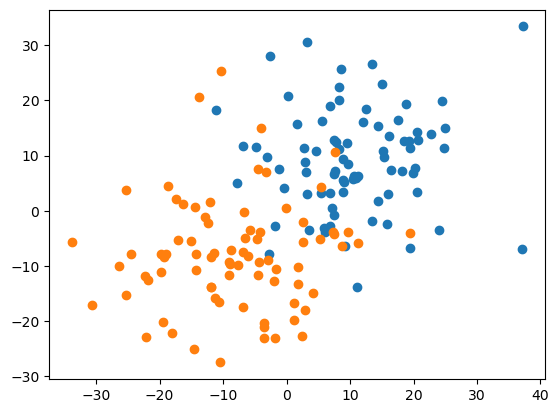

Class 1: mean = [10, 10], cov = [[100, 0], [0, 100]]
Class 2: mean = [-10, -10], cov = [[100, 0], [0, 100]]
Accuracy: 0.8


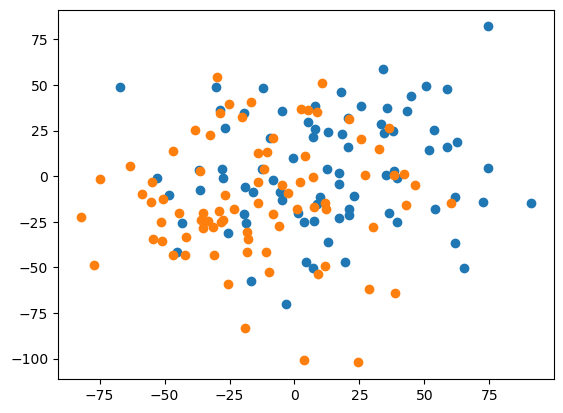

Class 1: mean = [10, 10], cov = [[1000, 0], [0, 1000]]
Class 2: mean = [-10, -10], cov = [[1000, 0], [0, 1000]]
Accuracy: 0.7


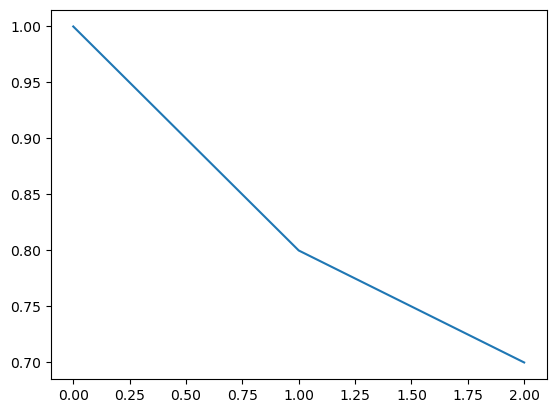

In [17]:
plt.plot([
    classify(mean=([10, 10], [-10, -10]), cov=([[20, 0], [0, 20]], [[20, 0], [0, 20]])),
    classify(mean=([10, 10], [-10, -10]), cov=([[100, 0], [0, 100]], [[100, 0], [0, 100]])),
    classify(mean=([10, 10], [-10, -10]), cov=([[1000, 0], [0, 1000]], [[1000, 0], [0, 1000]]))
])
plt.show()